In [1]:
#importing all packages needed, mostly from scikit learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score 

from sklearn.preprocessing import PolynomialFeatures





In [2]:
#load dataset
filename = '/filtered_rechtspraak_en.csv'
law_dataset = pd.read_csv(filename)

#add age variable
law_dataset['age'] = 2024 - law_dataset['geboren']

In [4]:
#get a preliminary idea of the dataset --> TABLE 1 IN THE REPORT
sum_table = law_dataset.describe()
print(sum_table)

                  id       geboren  commasinjurors   aantalzaken  \
count   15579.000000  15579.000000    14076.000000  15579.000000   
mean    58869.691765   1989.609474        1.868713      1.610566   
std     42490.740716    173.679089        0.489563      5.367926   
min        13.000000      0.000000        0.000000      0.000000   
25%     23249.000000   1972.000000        2.000000      0.000000   
50%     49902.000000   1985.000000        2.000000      0.000000   
75%     89587.000000   1995.000000        2.000000      3.000000   
max    141872.000000   9303.000000        7.000000    435.000000   

          is_guilty  plural_court  jailsentence           age  
count  15579.000000  15579.000000  15579.000000  15579.000000  
mean       0.743308      0.953656      0.755183     34.390526  
std        0.436822      0.210237      0.429992    173.679089  
min        0.000000      0.000000      0.000000  -7279.000000  
25%        0.000000      1.000000      1.000000     29.000000  
50%

In [5]:
law_dataset.head()

,id,urlshort,verdachte,geboren,beslissing,strafmaat,zittingsplaats,namenvandejuryleden,commasinjurors,aantalzaken,is_guilty,plural_court,jailsentence,verdachte_en,beslissing_en,strafmaat_en,age
0,13,RBMNE:2024:2414&showbutton=true,"geboren op [1987] te [geboorteplaats] , wonend...",1987,De rechtbank: Bewezenverklaring - verklaart he...,4 (vier) jaar/ proeftijd van 5 (vijf) jaar vas...,Lelystad,"J.W.B. Snijders Blok, R.P.P. Hoekstra, A.M. Loots",2.0,3,1,1,1,"born [1987] at [birthplace] , residing at [add...",The court: Provenance - declares that the defe...,4 (four) year/ probationary period of 5 (five)...,37
1,16,RBMNE:2024:2381&showbutton=true,geboren op [geboortedatum 1] 1979 te [geboorte...,1979,De rechtbank: Vrijspraak  verklaart het onder...,"2, 3 en 5/ 360 dagen/ 87 dagen/ Bijlage I: de ...",Utrecht,"H.A. Brouwer, J. Edgar, L.C. Michon",2.0,5,1,1,1,born on [birth date 1] 1979 at [birthplace 1] ...,The court: An acquittal shall not prove the ac...,"2, 3 and 5/ 360 days/ 87 days/ Annex I: The ch...",45
2,17,RBZWB:2024:2543&showbutton=true,geboren op [geboortedag 1] 1989 te [geboortepl...,1989,De rechtbank: Bewezenverklaring - verklaart he...,"een gevangenisstraf van zeven maanden, waarvan...",Breda,"K. Verschueren, W.A.H.A. Schnitzler-Strijbos, ...",2.0,4,1,1,1,born on [birthday 1] 1989 at [birthplace 1] re...,The court: Prove - declares the evidence indic...,"a sentence of seven months, of which three mon...",35
3,18,RBZWB:2024:2544&showbutton=true,"geboren op [geboortedag] 1987, te [geboortepla...",1987,De rechtbank: Vrijspraak: - spreekt verdachte ...,"betaling van een geldboete van € 1.500,=/ verv...",Breda,"M.E.I. Beudeker, M. van de Wetering, D.S.G. Fr...",2.0,4,1,1,1,"born on [birthday] 1987, at [birthplace] , wit...",The court: Acquittal: - exonerates suspect fro...,"payment of a fine of €1,500,=/ replacement det...",37
4,20,RBZWB:2024:2547&showbutton=true,", geboren op [geboortedag] 1980, te [geboortep...",1980,De rechtbank: Vrijspraak - spreekt verdachte v...,"spreekt verdachte vrij/ [benadeelde 3] , [bena...",Breda,"D.L.J. Martens, M.E.I. Beudeker, F.L. Donders",2.0,0,0,1,0,", born [birthday] 1980, born [birthplace] , re...",The court: Acquittal - exonerates suspect from...,"exonerates suspect/ [disadvantaged 3] , [disad...",44


In [6]:
#see distribution of is_guilty variable in the dataset
law_dataset['is_guilty'].value_counts()

1    11580
0     3999
Name: is_guilty, dtype: int64

In [7]:
#remove unneccesary columns
law_data_clean = law_dataset.drop(columns = ['id', 'urlshort', 'verdachte', 'geboren', 'beslissing', 'strafmaat', 'namenvandejuryleden', 'commasinjurors', 'verdachte_en', 'beslissing_en', 'strafmaat_en'])

In [8]:
#rename columns to English terms
law_data_clean = law_data_clean.rename(columns = {"aantalzaken": "amount_of_cases", "zittingsplaats": "courtcity"})

In [9]:
#remove rows with ages below 18 and above 100, to keep only adults and remove infeasible ages
law_data_clean = law_data_clean[law_data_clean['age'].between(18,100)]
law_data_clean.count()
#15.579 - 14.961 = 618 rows dropped

courtcity          14961
amount_of_cases    14961
is_guilty          14961
plural_court       14961
jailsentence       14961
age                14961
dtype: int64

In [10]:
#check distribution of age variable --> PART OF TABLE 2 IN THE REPORT
law_data_clean['age'].describe()

count    14961.000000
mean        41.817325
std         14.890347
min         18.000000
25%         30.000000
50%         40.000000
75%         52.000000
max         97.000000
Name: age, dtype: float64

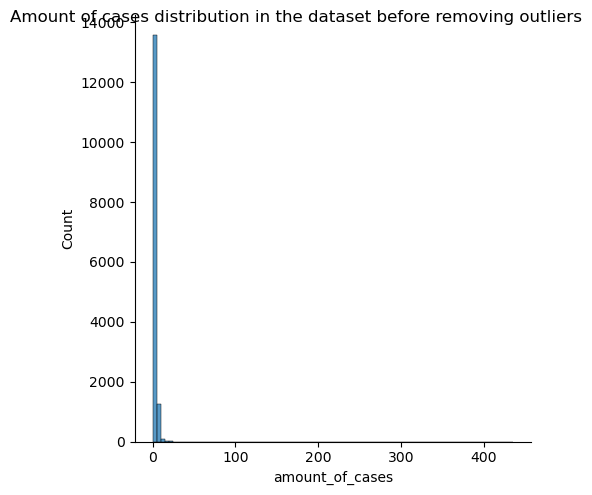

In [11]:
#plot the age distribution in the dataset --> FIGURE 2 IN THE REPORT
plot = sns.displot(law_data_clean, x="amount_of_cases", binwidth=5)
plot.fig.suptitle('Amount of cases distribution in the dataset before removing outliers')

plot.savefig('amount_cases_distribution_before_outliers.png')


In [12]:
#remove outliers from the amount_of_cases variable using z-scores
law_data_clean['amount_of_cases'].describe()

#calculate Q1 and Q3, to use to define boundaries
Q1 = np.percentile(law_data_clean['amount_of_cases'], 25, method='midpoint')
Q3 = np.percentile(law_data_clean['amount_of_cases'], 75, method='midpoint')
IQR = Q3 - Q1

low_bound = Q1 - 1.5*IQR
up_bound = Q3 + 1.5*IQR

#remove amount of cases < 0
law_data_clean = law_data_clean[law_data_clean['amount_of_cases'].between(0,100)]
law_data_clean.count()
#15526 - 15524 = 2 cases dropped

#assess which values of amount_of_cases exceed the outlier boundary
outlier_upper = np.where(law_data_clean['amount_of_cases'] >= up_bound)[0]
outlier_lower = np.where(law_data_clean['amount_of_cases'] <= low_bound)[0]

#check which indices are not in the dataset
missing = [i for i in outlier_upper if i not in law_data_clean.index]
outlier_upper = outlier_upper[~np.isin(outlier_upper, missing)]

# #see how many outliers will be removed
print(len(outlier_upper))
print(len(outlier_lower))

250
0


In [13]:
#removing outliers from the dataset (lower bound has no outliers)
law_data_clean.drop(index=outlier_upper, inplace=True)

In [14]:
#PART OF TABLE 2 IN THE REPORT
law_data_clean['amount_of_cases'].describe()

count    14709.000000
mean         1.592154
std          2.177317
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         24.000000
Name: amount_of_cases, dtype: float64

In [15]:
law_data_clean['courtcity'].value_counts()

#drop rows where courtcity is missing

law_data_clean = law_data_clean[law_data_clean['courtcity'] != '.']
law_data_clean = law_data_clean[law_data_clean['courtcity'] != 'de']
law_data_clean = law_data_clean[law_data_clean['courtcity'] != 'te']
law_data_clean = law_data_clean[law_data_clean['courtcity'] != 'Rechtbank']

law_data_clean.describe()

,amount_of_cases,is_guilty,plural_court,jailsentence,age
count,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000
mean,1.958561,0.818472,0.979532,0.824092,40.632078
std,2.261836,0.385472,0.141601,0.380758,14.141312
min,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,1.000000,1.000000,29.000000
50%,2.000000,1.000000,1.000000,1.000000,38.000000
75%,3.000000,1.000000,1.000000,1.000000,51.000000
max,24.000000,1.000000,1.000000,1.000000,96.000000


In [16]:
#one-hot encoding courtcity
law_data_clean_enc = pd.get_dummies(law_data_clean, columns=['courtcity'], drop_first=True)

law_data_clean_enc.head()

,amount_of_cases,is_guilty,plural_court,jailsentence,age,courtcity_Amsterdam,courtcity_Arnhem,courtcity_Assen,courtcity_Breda,courtcity_Groningen,courtcity_Lelystad,courtcity_Maastricht,courtcity_Middelburg,courtcity_Roermond,courtcity_Rotterdam,courtcity_Schiphol,courtcity_Utrecht,courtcity_Zutphen,courtcity_Zwolle
0,3,1,1,1,37,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,1,1,1,45,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,1,1,1,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
#TABLE 3 IN THE REPORT
law_data_clean['courtcity'].value_counts()

Breda         2182
Zwolle        1868
Utrecht       1786
Almelo        1552
Arnhem        1407
Lelystad       901
Zutphen        849
Middelburg     689
Maastricht     329
Roermond       324
Amsterdam       26
Rotterdam        4
Schiphol         2
Assen            1
Groningen        1
Name: courtcity, dtype: int64

In [18]:
law_data_clean_enc.describe()

,amount_of_cases,is_guilty,plural_court,jailsentence,age,courtcity_Amsterdam,courtcity_Arnhem,courtcity_Assen,courtcity_Breda,courtcity_Groningen,courtcity_Lelystad,courtcity_Maastricht,courtcity_Middelburg,courtcity_Roermond,courtcity_Rotterdam,courtcity_Schiphol,courtcity_Utrecht,courtcity_Zutphen,courtcity_Zwolle
count,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.00000,11921.000000,11921.000000
mean,1.958561,0.818472,0.979532,0.824092,40.632078,0.002181,0.118027,0.000084,0.183038,0.000084,0.075581,0.027598,0.057797,0.027179,0.000336,0.000168,0.14982,0.071219,0.156698
std,2.261836,0.385472,0.141601,0.380758,14.141312,0.046652,0.322654,0.009159,0.386714,0.009159,0.264337,0.163826,0.233369,0.162611,0.018316,0.012952,0.35691,0.257201,0.363531
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,24.000000,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


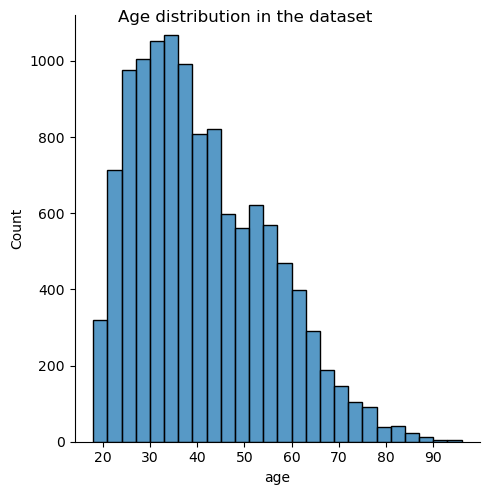

In [19]:
#plot the age distribution in the dataset --> FIGURE 3 IN THE REPORT
plot = sns.displot(law_data_clean_enc, x="age", binwidth=3)
plot.fig.suptitle('Age distribution in the dataset')

plot.savefig('age_distribution.png')

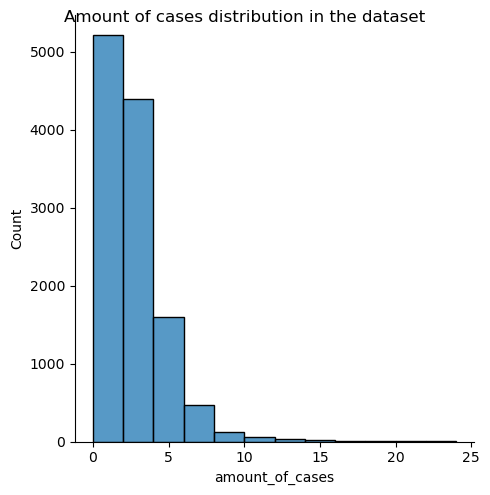

In [20]:
#plot the amount of cases distribution in the dataset (after removing outliers) --> FIGURE 4 IN THE REPORT
plot = sns.displot(law_data_clean_enc, x="amount_of_cases", binwidth=2)
plot.fig.suptitle('Amount of cases distribution in the dataset')

plot.savefig('amount_of_cases_distribution.png')


In [21]:
#see how many jailsentences and not going to jail are in the dataset
law_data_clean_enc['jailsentence'].value_counts()

1    9824
0    2097
Name: jailsentence, dtype: int64

In [22]:
#see how many plural and singular courts are in the dataset
law_data_clean_enc['plural_court'].value_counts()

1    11677
0      244
Name: plural_court, dtype: int64

In [23]:
#TABLE 4 IN THE REPORT
crosstable = pd.crosstab(law_data_clean_enc['is_guilty'], law_data_clean_enc['jailsentence'])

print(crosstable)


jailsentence     0     1
is_guilty               
0             1228   936
1              869  8888


In [24]:
#remove infeasible data points (not guilty and received a jail sentence)
law_data_clean_enc = law_data_clean_enc[~((law_data_clean_enc['jailsentence'] == 1) & (law_data_clean_enc['is_guilty'] == 0))]

In [25]:
#see how many cases are left
law_data_clean_enc['jailsentence'].value_counts()

1    8888
0    2097
Name: jailsentence, dtype: int64

In [26]:
#define predictor variable to later split the dataset in predictors and target variable
predictor_var = 'jailsentence'

#create different variables for predictor and predicted variables
X = law_data_clean_enc.drop(columns=[predictor_var])
y = law_data_clean_enc[predictor_var]

In [27]:
#split data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [28]:
# Train and test an unbalanced logistic regression model
model_LR_unbalanced = LogisticRegression(max_iter=1000)  # No class_weight parameter
model_LR_unbalanced.fit(X_train, y_train)


# Predict on test set
y_pred_LR_unbalanced = model_LR_unbalanced.predict(X_test)

# Evaluation
print("Accuracy (Unbalanced LR):", accuracy_score(y_test, y_pred_LR_unbalanced))
print("\nClassification Report (Unbalanced LR):")
print(classification_report(y_test, y_pred_LR_unbalanced))


#calculate effect sizes of the predictor variables:
#first, define which columns represent cities, so they can be combined later on
column_names = X.columns

#calculate coefficients for all predictor variables:
coefficients = np.exp(model_LR_unbalanced.coef_[0])

#TABLE 9 IN THE REPORT: 
for variable, coeff in zip(column_names, coefficients):
    print(f"coefficient [{variable}]: {coeff:.2f}")

Accuracy (Unbalanced LR): 0.9162621359223301

Classification Report (Unbalanced LR):
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       669
           1       0.90      1.00      0.95      2627

    accuracy                           0.92      3296
   macro avg       0.95      0.79      0.85      3296
weighted avg       0.92      0.92      0.91      3296

coefficient [amount_of_cases]: 1.13
coefficient [is_guilty]: 1476.82
coefficient [plural_court]: 2.80
coefficient [age]: 1.03
coefficient [courtcity_Amsterdam]: 0.71
coefficient [courtcity_Arnhem]: 0.70
coefficient [courtcity_Assen]: 0.99
coefficient [courtcity_Breda]: 0.66
coefficient [courtcity_Groningen]: 1.05
coefficient [courtcity_Lelystad]: 1.23
coefficient [courtcity_Maastricht]: 1.39
coefficient [courtcity_Middelburg]: 0.54
coefficient [courtcity_Roermond]: 1.16
coefficient [courtcity_Rotterdam]: 1.26
coefficient [courtcity_Schiphol]: 1.02
coefficient [courtcity_Utrecht]: 1

In [29]:
#train and test a balance logistic regression model (to adapt for unbalanced class distribution of target variable)
model_LR_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_LR_balanced.fit(X_train, y_train)

#predict target variable in test set
y_pred_LR_balanced = model_LR_balanced.predict(X_test)

#model performance
print("Accuracy (balanced LR):", accuracy_score(y_test, y_pred_LR_balanced))
print("\nClassification Report balanced LR:")
print(classification_report(y_test, y_pred_LR_balanced))

Accuracy (balanced LR): 0.9108009708737864

Classification Report balanced LR:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       669
           1       0.91      0.98      0.95      2627

    accuracy                           0.91      3296
   macro avg       0.90      0.81      0.84      3296
weighted avg       0.91      0.91      0.90      3296



In [30]:
#HYPERPARAMETER TUNING using grid search
#define the parameter grid --> TABLE 5 IN THE REPORT
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   #strength of regularization
    'penalty': ['l1', 'l2'],               #type of regularization               
    'class_weight': ['balanced']           #keep class balancing
}

grid_LR = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_LR,
    cv=5,                           #5-fold cross-validation
    scoring='recall_macro',         #objective: maximize recall
    n_jobs=-1                       #use all available cores
)

#fit the model
grid_LR.fit(X_train, y_train)

#print best parameters
print("Best parameters for Logistic Regression:", grid_LR.best_params_)

#predict target variables of test set
y_pred_LR_tuned = grid_LR.predict(X_test)

#model performance
print("Accuracy (Grid search Tuned LR):", accuracy_score(y_test, y_pred_LR_tuned))
print("\nClassification Report (Grid search  Tuned LR):")
print(classification_report(y_test, y_pred_LR_tuned))


C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\

Best parameters for Logistic Regression: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy (Grid search Tuned LR): 0.9101941747572816

Classification Report (Grid search  Tuned LR):
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       669
           1       0.91      0.98      0.95      2627

    accuracy                           0.91      3296
   macro avg       0.90      0.81      0.84      3296
weighted avg       0.91      0.91      0.90      3296



In [31]:
#threshold calibration for Logistic Regression (Tuned)
y_pred_proba_LR = grid_LR.predict_proba(X_test)[:, 1]

#lower treshold 
threshold_LR = 0.4  

#apply threshold
y_pred_LR_threshold = (y_pred_proba_LR >= threshold_LR).astype(int)

#model performance:
print(f"\n--- Logistic Regression with threshold = {threshold_LR} ---")
print("Accuracy:", accuracy_score(y_test, y_pred_LR_threshold))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR_threshold))


--- Logistic Regression with threshold = 0.4 ---
Accuracy: 0.9135315533980582

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73       669
           1       0.91      1.00      0.95      2627

    accuracy                           0.91      3296
   macro avg       0.94      0.79      0.84      3296
weighted avg       0.92      0.91      0.91      3296



In [32]:
#add interaction terms to logistic regression
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

#transform your X_train and X_test
X_train_inter = poly.fit_transform(X_train)
X_test_inter = poly.transform(X_test)

In [33]:
#train logistic regression model with interaction effects and grid search optimization
param_grid_LR_inter = {
    'C': [0.01, 0.1, 1, 10],      
    'penalty': ['l1', 'l2'],      
    'class_weight': ['balanced']
}

grid_LR_inter = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_LR_inter,
    cv=5,
    scoring='recall_macro',
    n_jobs=-1
)

#fit the model
grid_LR_inter.fit(X_train_inter, y_train)

#print best parameters
print("Best parameters for Logistic Regression with interactions:", grid_LR_inter.best_params_)

#predict target variables of test set
y_pred_LR_inter = grid_LR_inter.predict(X_test_inter)

#performance of the model: 
print("Accuracy (Logistic Regression with interactions):", accuracy_score(y_test, y_pred_LR_inter))
print("\nClassification Report (Logistic Regression with interactions):")
print(classification_report(y_test, y_pred_LR_inter))

C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\20202300\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\

Best parameters for Logistic Regression with interactions: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy (Logistic Regression with interactions): 0.9010922330097088

Classification Report (Logistic Regression with interactions):
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       669
           1       0.92      0.96      0.94      2627

    accuracy                           0.90      3296
   macro avg       0.87      0.81      0.83      3296
weighted avg       0.90      0.90      0.90      3296



In [34]:
#train and test a decision tree model
model_DT = DecisionTreeClassifier(random_state=40)
model_DT.fit(X_train, y_train)

#predict target variable of test set
y_pred_DT = model_DT.predict(X_test)

#performance of the model:
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_DT))
print("\nClassification Report Decision Tree:")
print(classification_report(y_test, y_pred_DT))

Accuracy Decision Tree: 0.897754854368932

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       669
           1       0.92      0.96      0.94      2627

    accuracy                           0.90      3296
   macro avg       0.86      0.81      0.83      3296
weighted avg       0.89      0.90      0.89      3296



In [35]:
#hyperparameter tuning for decision tree using grid search
#parameter grid for Decision Tree --> TABLE 6 IN THE REPORT
param_grid_DT = {
    'max_depth': [3, 5, 10, 20, None],      #control depth of tree
    'min_samples_split': [2, 5, 10, 20],    #minimum samples to split
    'min_samples_leaf': [1, 2, 5, 10],      #minimum samples per leaf
    'class_weight': [None, 'balanced']      #try both balanced and unbalanced model
}

grid_DT = GridSearchCV(
    DecisionTreeClassifier(random_state=40),
    param_grid_DT,
    cv=5,
    scoring='recall_macro',  
    n_jobs=-1
)

#fit the model to find best hyperparameters
grid_DT.fit(X_train, y_train)

#print best parameters
print("Best parameters for Decision Tree:", grid_DT.best_params_)

#predict target variable of test set
y_pred_DT_tuned = grid_DT.predict(X_test)

#model performance; 
print("Accuracy (Grid Search Tuned Decision Tree):", accuracy_score(y_test, y_pred_DT_tuned))
print("\nClassification Report (Grid Search Tuned Decision Tree):")
print(classification_report(y_test, y_pred_DT_tuned))


Best parameters for Decision Tree: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy (Grid Search Tuned Decision Tree): 0.9165655339805825

Classification Report (Grid Search Tuned Decision Tree):
              precision    recall  f1-score   support

           0       0.92      0.64      0.76       669
           1       0.92      0.99      0.95      2627

    accuracy                           0.92      3296
   macro avg       0.92      0.82      0.85      3296
weighted avg       0.92      0.92      0.91      3296



In [36]:
#threshold calibration for Decision Tree (Tuned)
y_pred_proba_DT = grid_DT.predict_proba(X_test)[:, 1]

#lower the threshold
threshold_DT = 0.4

#apply threshold
y_pred_DT_threshold = (y_pred_proba_DT >= threshold_DT).astype(int)

#model performance
print(f"\n--- Decision Tree with threshold = {threshold_DT} ---")
print("Accuracy DT with threshold:", accuracy_score(y_test, y_pred_DT_threshold))
print("\nClassification Report DT with threshold:")
print(classification_report(y_test, y_pred_DT_threshold))


--- Decision Tree with threshold = 0.4 ---
Accuracy DT with threshold: 0.9217233009708737

Classification Report DT with threshold:
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       669
           1       0.91      0.99      0.95      2627

    accuracy                           0.92      3296
   macro avg       0.94      0.81      0.86      3296
weighted avg       0.93      0.92      0.92      3296



In [37]:
#train and test a random forest algorithm
model_RF = RandomForestClassifier(n_estimators=100, random_state=40)
model_RF.fit(X_train, y_train)

#predict target variable of test set
y_pred_RF = model_RF.predict(X_test)

#model performance
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_RF))
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_RF))

Accuracy Random Forest: 0.9144417475728155

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       669
           1       0.91      0.98      0.95      2627

    accuracy                           0.91      3296
   macro avg       0.91      0.81      0.85      3296
weighted avg       0.91      0.91      0.91      3296



In [38]:
#HYPERPARAMETER TUNING for random forest using grid search --> TABLE 7 IN THE REPORT
param_grid_RF_medium = {
    'n_estimators': [100, 200],          #nr of estimators used
    'max_depth': [10, 20, None],         #depth of trees
    'min_samples_split': [2, 5],         #minimum samples in each split
    'min_samples_leaf': [1, 2],          #minimum samples in each leaf
    'max_features': ['sqrt', 'log2'],    
    'class_weight': ['balanced']         #again, balanced model
}

grid_RF_medium = GridSearchCV(
    RandomForestClassifier(random_state=40),
    param_grid_RF_medium,
    cv=5,
    scoring='recall_macro', 
    n_jobs=-1
)

#fit model to find best hyperparameters
grid_RF_medium.fit(X_train, y_train)

#print best hyperparameters
print("Best parameters for Random Forest (Medium Grid):", grid_RF_medium.best_params_)

#predict target variable of test set
y_pred_RF_tuned_medium = grid_RF_medium.predict(X_test)

#model performance
print("Accuracy (Tuned Random Forest - Medium Grid):", accuracy_score(y_test, y_pred_RF_tuned_medium))
print("\nClassification Report (Tuned Random Forest - Medium Grid):")
print(classification_report(y_test, y_pred_RF_tuned_medium))

Best parameters for Random Forest (Medium Grid): {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy (Tuned Random Forest - Medium Grid): 0.9195995145631068

Classification Report (Tuned Random Forest - Medium Grid):
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       669
           1       0.92      0.99      0.95      2627

    accuracy                           0.92      3296
   macro avg       0.93      0.82      0.86      3296
weighted avg       0.92      0.92      0.91      3296



In [39]:
#threshold adjustment
y_pred_proba_RF = grid_RF_medium.predict_proba(X_test)[:, 1]

#lower threshold
threshold = 0.4  

#apply threshold
y_pred_RF_threshold = (y_pred_proba_RF >= threshold).astype(int)

#model performance
print(f"\n--- Random Forest with threshold = {threshold} ---")
print("Accuracy:", accuracy_score(y_test, y_pred_RF_threshold))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RF_threshold))


--- Random Forest with threshold = 0.4 ---
Accuracy: 0.9223300970873787

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       669
           1       0.92      0.99      0.95      2627

    accuracy                           0.92      3296
   macro avg       0.94      0.82      0.86      3296
weighted avg       0.93      0.92      0.92      3296



In [40]:
#below, a table is created with the performances of each model
#create empty list to store results
results = []

#create function to calculate the performance metrics for the different models
def add_model_results(model_name, y_true, y_pred):
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    precision_0 = precision_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    precision_1 = precision_score(y_true, y_pred, pos_label=1)
    accuracy = accuracy_score(y_true, y_pred)

    results.append({
        'Model': model_name,
        'Class 0 Recall': recall_0,
        'Class 0 Precision': precision_0,
        'Class 1 Recall': recall_1,
        'Class 1 Precision': precision_1,
        'Accuracy': accuracy
    })


#Logistic Regression
add_model_results('Unbalanced LR', y_test, y_pred_LR_unbalanced)
add_model_results('Balanced LR', y_test, y_pred_LR_balanced)
add_model_results('Tuned LR', y_test, y_pred_LR_tuned)
add_model_results('Tuned LR + threshold', y_test, y_pred_LR_threshold)
add_model_results('LR + Interactions', y_test, y_pred_LR_inter)


#Decision Tree
add_model_results('Tuned DT', y_test, y_pred_DT_tuned)
add_model_results('Tuned DT + threshold', y_test, y_pred_DT_threshold)

#Random Forest
add_model_results('Tuned RF', y_test, y_pred_RF_tuned_medium)
add_model_results('Tuned RF + threshold', y_test, y_pred_RF_threshold)

#create pandas dataframe
df_results = pd.DataFrame(results)

#display table sorted by Class 0 Recall --> TABLE 8 in report
df_results.sort_values(by='Class 0 Recall', ascending=False)


,Model,Class 0 Recall,Class 0 Precision,Class 1 Recall,Class 1 Precision,Accuracy
4,LR + Interactions,0.653214,0.822976,0.964218,0.916094,0.901092
7,Tuned RF,0.648729,0.935345,0.988580,0.917020,0.919600
5,Tuned DT,0.644245,0.920940,0.985915,0.915842,0.916566
8,Tuned RF + threshold,0.641256,0.964045,0.993909,0.915819,0.922330
1,Balanced LR,0.638266,0.891441,0.980206,0.914093,0.910801
2,Tuned LR,0.638266,0.887734,0.979444,0.914032,0.910194
6,Tuned DT + threshold,0.635277,0.968109,0.994671,0.914596,0.921723
3,Tuned LR + threshold,0.590433,0.972906,0.995813,0.905190,0.913532
0,Unbalanced LR,0.587444,1.000000,1.000000,0.904926,0.916262


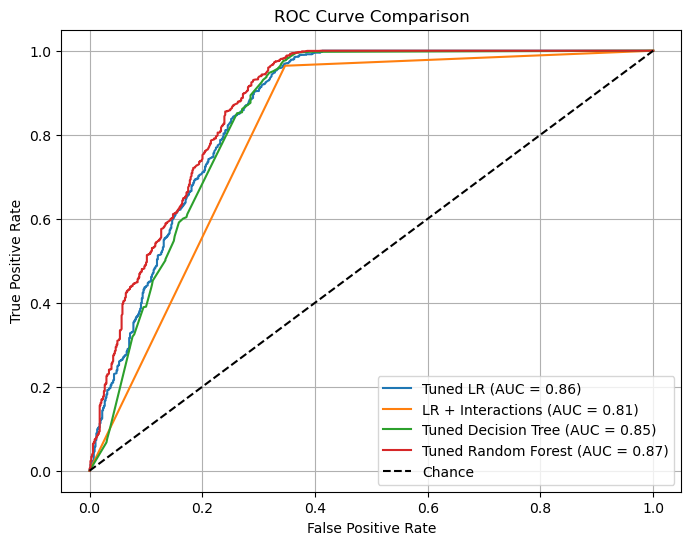

<Figure size 640x480 with 0 Axes>

In [47]:
#create ROC curves and calculate AUCs for visualization in report --> FIGURE [X] in report
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_pred_proba_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

fpr_LR_inter, tpr_LR_inter, _ = roc_curve(y_test, y_pred_LR_inter)
roc_auc_LR_inter = auc(fpr_LR_inter, tpr_LR_inter)

fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred_proba_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_proba_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

#plot the different ROC curves into one figure --> FIGURE 8 IN THE REPORT
plt.figure(figsize=(8, 6))

plt.plot(fpr_LR, tpr_LR, label=f'Tuned LR (AUC = {roc_auc_LR:.2f})')
plt.plot(fpr_LR_inter, tpr_LR_inter, label=f'LR + Interactions (AUC = {roc_auc_LR_inter:.2f})')
plt.plot(fpr_DT, tpr_DT, label=f'Tuned Decision Tree (AUC = {roc_auc_DT:.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'Tuned Random Forest (AUC = {roc_auc_RF:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.savefig('ROC curve comparison.jpg')

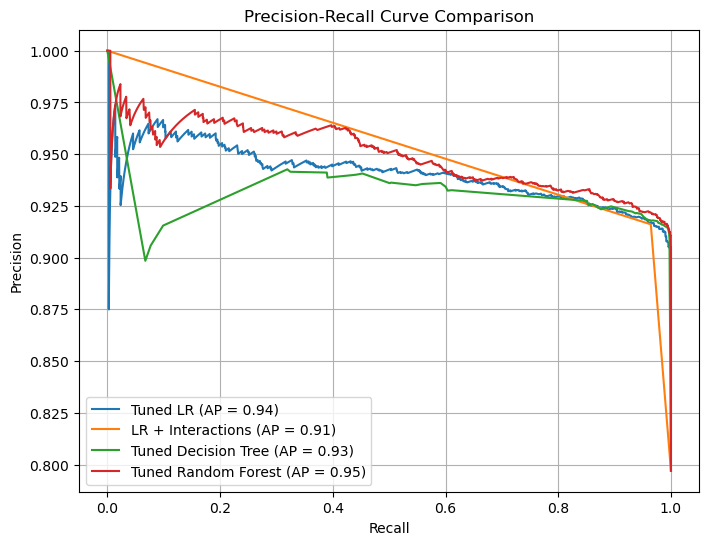

<Figure size 640x480 with 0 Axes>

In [44]:
#compute precision-recall curves and average precision scores (area under PR curve) --> FIGURE [X] in report
precision_LR, recall_LR, _ = precision_recall_curve(y_test, y_pred_proba_LR)
ap_LR = average_precision_score(y_test, y_pred_proba_LR)

precision_LR_inter, recall_LR_inter, _ = precision_recall_curve(y_test, y_pred_LR_inter)
ap_LR_inter = average_precision_score(y_test, y_pred_LR_inter)

precision_DT, recall_DT, _ = precision_recall_curve(y_test, y_pred_proba_DT)
ap_DT = average_precision_score(y_test, y_pred_proba_DT)

precision_RF, recall_RF, _ = precision_recall_curve(y_test, y_pred_proba_RF)
ap_RF = average_precision_score(y_test, y_pred_proba_RF)


# Plot PR curves --> FIGURE 7 IN THE REPORT
plt.figure(figsize=(8, 6))

plt.plot(recall_LR, precision_LR, label=f'Tuned LR (AP = {ap_LR:.2f})')
plt.plot(recall_LR_inter, precision_LR_inter, label=f'LR + Interactions (AP = {ap_LR_inter:.2f})')
plt.plot(recall_DT, precision_DT, label=f'Tuned Decision Tree (AP = {ap_DT:.2f})')
plt.plot(recall_RF, precision_RF, label=f'Tuned Random Forest (AP = {ap_RF:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.grid()
plt.show()

plt.savefig('precision-recall curve comparison.png')

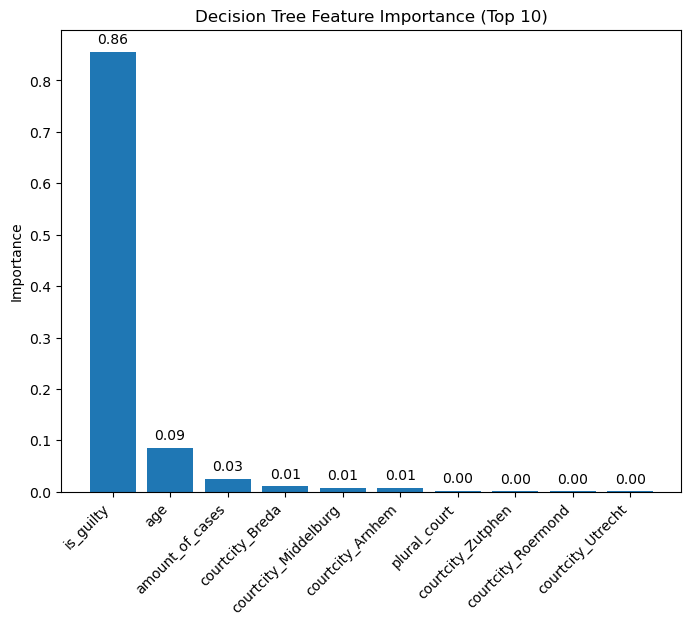

In [45]:
#get feature importances from tuned Decision Tree for comparison to Random Forest --> FIGURE [X] in report
importances_DT = grid_DT.best_estimator_.feature_importances_
#sort the importances 
indices = np.argsort(importances_DT)[::-1]

#FIGURE 5 IN THE REPORT
plt.figure(figsize=(8, 6))
plt.title("Decision Tree Feature Importance (Top 10)")
bars = plt.bar(range(10), importances_DT[indices][:10], align='center')
plt.xticks(range(10), [column_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.ylabel('Importance')

#add exact values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.savefig('decision tree feature importance (top 10).png')

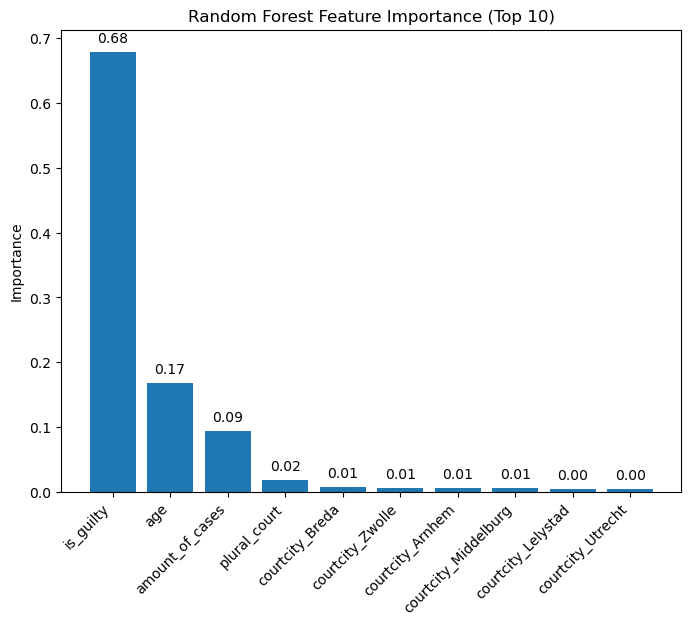

In [46]:
#get feature importances from tuned Random Forest
importances_RF = grid_RF_medium.best_estimator_.feature_importances_
#sort importances
indices = np.argsort(importances_RF)[::-1]

#FIGURE 6 IN THE REPORT
plt.figure(figsize=(8, 6))
plt.title("Random Forest Feature Importance (Top 10)")
bars = plt.bar(range(10), importances_RF[indices][:10], align='center')
plt.xticks(range(10), [column_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.ylabel('Importance')

# Add exact values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.savefig('random forest feature importance (top 10).png')
